In [1]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def eq1(r,l):
    return r**4/l

def eq2(d,l):
    return d**4/l

def d(r):
    return 2*r

def r(d):
    return d/2

def I(V,t):
    return V/t

def mean(a):
    return sum(a)/len(a)

d1=0.80
l1=119.6
d4=0.95
l4=118.5
d3=0.82
l3=81.7
d5=0.89
l5=80
d2=0.82
l2=122.3

print('d 1',eq2(d1,l1))
print('d 2',eq2(d2,l2))
print('d 3',eq2(d3,l3))
print('d 4',eq2(d4,l4))
print('d 5',eq2(d5,l5))

d 1 0.0034247491638795995
d 2 0.003696825511038429
d 3 0.00553392607099143
d 4 0.00687347046413502
d 5 0.007842780125


[0.2786885245901639+/-0.016621044817052635
 0.30085959885386815+/-0.024263666637051408
 0.27910685805422647+/-0.010106909488038648
 0.27845845399866337+/-0.01129272640424173
 0.30437188710570007+/-0.02812780402998205]
[0.89637702 0.00485885]


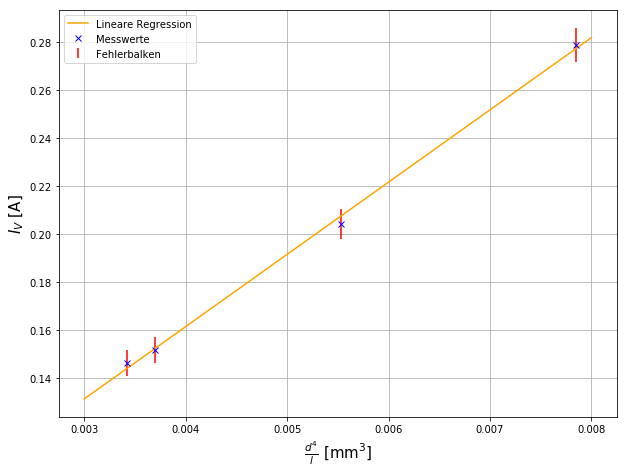

In [10]:
uv=0.5
ut=0.3

I1=mean(np.array([I(ufloat(5.5,uv),ufloat(38.56,ut)),I(ufloat(6.0,uv),ufloat(40.14,ut)),I(ufloat(7.5,uv),ufloat(50.74,ut)),I(ufloat(8.0,uv),ufloat(59.79,ut)),I(ufloat(5.0,uv),ufloat(31.52,ut))]))
I4=mean(np.array([I(ufloat(8.5,uv),ufloat(30.50,ut)),I(ufloat(6.3,uv),ufloat(20.94,ut)),I(ufloat(14.0,uv),ufloat(50.16,ut)),I(ufloat(12.5,uv),ufloat(44.89,ut)),I(ufloat(5.5,uv),ufloat(18.07,ut))]))
I3=mean(np.array([I(ufloat(9.7,uv),ufloat(48.52,ut)),I(ufloat(7.0,uv),ufloat(34.81,ut)),I(ufloat(8.0,uv),ufloat(38.8,ut)),I(ufloat(5.5,uv),ufloat(25.58,ut)),I(ufloat(11.5,uv),ufloat(57.77,ut))]))
I5=mean(np.array([I(ufloat(13.0,uv),ufloat(47.28,ut)),I(ufloat(9.0,uv),ufloat(32.83,ut)),I(ufloat(6.0,uv),ufloat(20.32,ut)),I(ufloat(11.7,uv),ufloat(42.32,ut)),I(ufloat(15.0,uv),ufloat(54.86,ut))]))
I2=mean(np.array([I(ufloat(5.0,uv),ufloat(31.09,ut)),I(ufloat(7.7,uv),ufloat(56.25,ut)),I(ufloat(7.5,uv),ufloat(50.15,ut)),I(ufloat(7.0,uv),ufloat(45.27,ut)),I(ufloat(6.0,uv),ufloat(38.184,ut))]))

print(np.array([I(ufloat(8.5,uv),ufloat(30.50,ut)),I(ufloat(6.3,uv),ufloat(20.94,ut)),I(ufloat(14.0,uv),ufloat(50.16,ut)),I(ufloat(12.5,uv),ufloat(44.89,ut)),I(ufloat(5.5,uv),ufloat(18.07,ut))]))

#Iarrayn=[I1.n,I2.n,I3.n,I4.n,I5.n]
#Iarrays=[I1.s,I2.s,I3.s,I4.s,I5.s]

Iarrayn=[I1.n,I2.n,I3.n,I5.n]#I5.n,I4.n]
Iarrays=[I1.s,I2.s,I3.s,I5.s]#I5.s,I4.s]
Iarray=[I1,I2,I3,I5]

meanI=mean(Iarray)

#darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d4,l4),eq2(d5,l5)]
darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d5,l5)]#eq2(d5,l5),eq2(d4,l4)]
#darrayn=[eq2(d1,l1).n,eq2(d2,l2).n,eq2(d3,l3).n,eq2(d4,l4).n,eq2(d5,l5).n]
#darrays=[eq2(d1,l1).s,eq2(d2,l2).s,eq2(d3,l3).s,eq2(d4,l4).s,eq2(d5,l5).s]

#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(0.003,0.008,100)
popt,pcov=curve_fit(fitfunc,darray,Iarrayn)
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+fit
dfit2=(a-c)*(xfit)+fit
#plt.plot(xfit,dfit1,'--',color='orange')
#plt.plot(xfit,dfit2,'--',color='orange')

plt.plot(darray,Iarrayn,'x',label='Messwerte',color='blue')
plt.errorbar(x=darray,y=Iarrayn,yerr=Iarrays,fmt='none',label='Fehlerbalken',color='red')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{d^4}{l}\ [\mathrm{mm}^3]$',size='15')
plt.ylabel(r'$I_V\ [\mathrm{A}]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.legend()
#plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/9_8/graph_without_5.png',dpi=300)
plt.show()

[4.96928422 0.02852677]


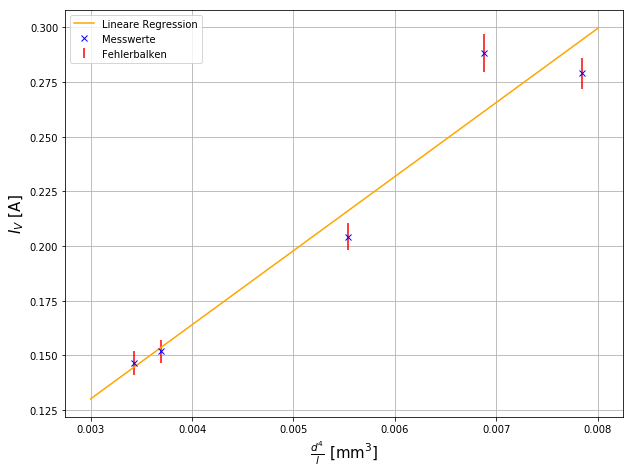

In [9]:
Iarrayn=[I1.n,I2.n,I3.n,I4.n,I5.n]
Iarrays=[I1.s,I2.s,I3.s,I4.s,I5.s]
Iarray=[I1,I2,I3,I4,I5]

meanI=mean(Iarray)

darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d4,l4),eq2(d5,l5)]

#Fitten
xfit=np.linspace(0.003,0.008,100)
popt,pcov=curve_fit(fitfunc,darray,Iarrayn)
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+fit
dfit2=(a-c)*(xfit)+fit
#plt.plot(xfit,dfit1,'--',color='orange')
#plt.plot(xfit,dfit2,'--',color='orange')

plt.plot(darray,Iarrayn,'x',label='Messwerte',color='blue')
plt.errorbar(x=darray,y=Iarrayn,yerr=Iarrays,fmt='none',label='Fehlerbalken',color='red')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{d^4}{l}\ [\mathrm{mm}^3]$',size='15')
plt.ylabel(r'$I_V\ [\mathrm{A}]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.legend()
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/9_8/graph_with_5.png',dpi=300)
plt.show()

In der Formel $I_V=\frac{V}{t}$ haben sowohl $V$ und $t$ Fehler. Wir verwenden hier also die verallgemeinerte Formel f\"ur Quotienten:
$$
\left\vert\frac{\Delta z}{z}\right\vert=\sqrt{\left(a\frac{\Delta x}{x}\right)^2+\left(b\frac{\Delta y}{y}\right)^2+\ldots}\textrm{ f\"ur }z=x^a\ y^b\ldots
$$
Hier also:
$$
\left\vert\frac{\Delta I_V}{I_V}\right\vert=\sqrt{\left(\frac{\Delta V}{V}\right)^2+\left(-1\frac{\Delta t}{t}\right)^2}
$$
Da $\frac{d^4}{l}$ aus Werten ohne vorhandenem Fehler bestehen, berechnen wir daf\"ur keinen Fehler.

Um unseren Mittelwert zu berechnen, rechnen wir ganz leicht mit 
$$
\frac{\sum_{i=1}^n I{_V_i}}{n}\label{mean}
$$
den Nominalwert, und mit
$$
s_x=\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{x})^2}\label{meanstd}
$$
die Standardunsichertheit dessen.

Unsere Mittelwerte der $I_V$ f\"ur jede Position werden dann gegen $\nicefrac{d^4}{l}$ aufgetragen, siehe Abbildung (\ref{Abb1}).

Da wir jedoch klar erkennen k\"onnen, dass $I{_V_4}$ mit der linearen Steigung der anderen Werte nicht \"ubereinstimmt, lassen wir diesen Wert weg und erhalten die Gerade, welche in Abbildung (\ref{Abb2}) gefunden werden kann.


Um die Steigung der Ausgleichsgeraden zu berechnen, nehmen wir folgende Formel zunutze:
$$
a=\frac{\sum x_i^2\sum y_i-\sum x_i\sum x_iy_i}{n\sum x_i^2-(\sum x_i)^2}
$$


In [11]:
def a(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

print(a(np.array(darray),np.array(Iarray)))

0.041+/-0.009


Wir erhalten als Ergebnis daraus f\"ur unser $a$ einen Wert von $(0.014\pm0.011)\,\mathrm{mm}^3$

Um aus unseren Werten $\Delta p$ zu berechnen, verwenden wir
$$
\Delta p=\rho_w hg
$$

In [12]:
rho=1000
g=9.81

def Dp(h):
    return rho*h*g

print(Dp(ufloat(0.0135,0.003)))

132+/-29


Da der einzige Wert mit einem Fehler $h$ ist, rechnen wir einfach mit
$$
\Delta z=\left|{\dif f}{\dif x}\right|\Delta x\textrm{ f\"ur }z=f(x)
$$
unseren Fehler aus.
Mit $\rho_w=1000\,\frac{\mathrm{kg}}{\mathrm{m}^3}$, $g=9.81\,\frac{\mathrm{m}}{\mathrm{s}^2}$ und $h=(135\pm3)\,\mathrm{mm}$ erhalten wir als Wert $\Delta p=(132\pm29)\,$bar.

Da wir als Endergebnis $\eta$ wollen, m\"ussen wir erstmal die Gleichung (\ref{hagen}) umstellen und wir erhalten:
$$
\eta=\frac{\pi R^4\Delta p}{8I_V l}.
$$
Hier haben $\Delta p$ und $I_V$ Fehler. Wir wenden also wieder die Gleichung f\"ur Produkte an und erhalten:
$$
\left\vert\frac{\Delta\eta}{\eta}\right\vert=\sqrt{\left(\frac{\Delta\Delta p}{\Delta p}\right)^2+\left(-1\frac{\Delta I_V}{I_V}\right)^2}
$$

In [13]:
def eta(R,p,I,l):
    return np.pi*R**4*p/(8*I*l)

Dep=Dp(ufloat(0.0135,0.003))

print(eta(d1/2,Dep,I1,l1))
print(eta(d2/2,Dep,I2,l3))
print(eta(d3/2,Dep,I3,l3))
print(eta(d5/2,Dep,I5,l5))

print(mean([eta(d1/2,Dep,I1,l1),eta(d2/2,Dep,I2,l2),eta(d4/2,Dep,I4,l4),eta(d5/2,Dep,I5,l5)]))

0.076+/-0.017
0.118+/-0.027
0.088+/-0.020
0.091+/-0.020
0.081+/-0.018


Als Ergebnis f\"ur $\eta$ erhalten wir f\"ur unsere vier verwendeten Messreihen:
$\begin{itemize}
\item (0.076\pm0.017)\,\mathrm{\frac{kg}{ms}}
\item (0.118\pm0.027)\,\mathrm{\frac{kg}{ms}}
\item (0.088\pm0.020)\,\mathrm{\frac{kg}{ms}}
\item (0.091\pm0.020)\,\mathrm{\frac{kg}{ms}}
\end{itemize}
$

Nutzen wir die Formeln (\ref{mean}) und (\ref{meanstd}) um unseren Mittelwert zu bestimmen, so erhalten wir als Standardunsicherheit
\[
0.08\pm0.018\,\mathrm{\frac{kg}{ms}}
\]

Als n\"achstes betrachten wir den durchschnittlichen Fehler der Messungen und die Streuung:

In [14]:
print(mean(Iarrays))
print(np.std(Iarrayn))

0.006002401151947
0.0532381980128027


Wir erhalten als durchschnittlichen Fehler $0.006\,$A und als Streuung $0.570\,$A.

Anhand der Fehlerbalken ist zu erkennen, dass der Fehler mit zunehmenden $\frac{d^4}{l}$ steigt. Da die Formel f\"ur $I_V$ zu  $\frac{1}{l}$ und $\left(\frac{d}{2}\right)^2$ proportional ist, aber diese Werte keine statistischen Fehler haben, ist klar, dass dies aufgrund von systematischer Fehler der Fall sein muss. Erstaunlich ist dies nicht, da sowohl $d$ und $l$ vorgegeben worden sind ohne Fehler, wodurch sie systematische Fehler sind.

